# CASE STUDY: BREAST CANCER CLASSIFICATION



- Predicting if the cancer diagnosis is benign or malignant based on several observations/features 


# IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
cancer = df

In [3]:
cancer

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [4]:
cancer.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df['target'] = np.where(df['diagnosis'] 
                       =='M', 1.0,0.0)

In [6]:
df['target_names'] = np.where(df['diagnosis'] 
                       =='M', 'malignant','benign' )
print(df['target_names'])

0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
         ...    
564    malignant
565    malignant
566    malignant
567    malignant
568       benign
Name: target_names, Length: 569, dtype: object


In [7]:
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [9]:
df.head(20)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302         M        17.99         10.38          122.80     1001.0   
1     842517         M        20.57         17.77          132.90     1326.0   
2   84300903         M        19.69         21.25          130.00     1203.0   
3   84348301         M        11.42         20.38           77.58      386.1   
4   84358402         M        20.29         14.34          135.10     1297.0   
5     843786         M        12.45         15.70           82.57      477.1   
6     844359         M        18.25         19.98          119.60     1040.0   
7   84458202         M        13.71         20.83           90.20      577.9   
8     844981         M        13.00         21.82           87.50      519.8   
9   84501001         M        12.46         24.04           83.97      475.9   
10    845636         M        16.02         23.24          102.70      797.8   
11  84610002         M        15.78         17.89          103.60      781.0   
12    846226         M        19.17         24.80          132.40     1123.0   
13    846381         M        15.85         23.95          103.70      782.7   
14  84667401         M        13.73         22.61           93.60      578.3   
15  84799002         M        14.54         27.54           96.73      658.8   
16    848406         M        14.68         20.13           94.74      684.5   
17  84862001         M        16.13         20.68          108.10      798.8   
18    849014         M        19.81         22.15          130.00     1260.0   
19   8510426         B        13.54         14.36           87.46      566.3   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.11840           0.27760         0.30010              0.14710   
1           0.08474           0.07864         0.08690              0.07017   
2           0.10960           0.15990         0.19740              0.12790   
3           0.14250           0.28390         0.24140              0.10520   
4           0.10030           0.13280         0.19800              0.10430   
5           0.12780           0.17000         0.15780              0.08089   
6           0.09463           0.10900         0.11270              0.07400   
7           0.11890           0.16450         0.09366              0.05985   
8           0.12730           0.19320         0.18590              0.09353   
9           0.11860           0.23960         0.22730              0.08543   
10          0.08206           0.06669         0.03299              0.03323   
11          0.09710           0.12920         0.09954              0.06606   
12          0.09740           0.24580         0.20650              0.11180   
13          0.08401           0.10020         0.09938              0.05364   
14          0.11310           0.22930         0.21280              0.08025   
15          0.11390           0.15950         0.16390              0.07364   
16          0.09867           0.07200         0.07395              0.05259   
17          0.11700           0.20220         0.17220              0.10280   
18          0.09831           0.10270         0.14790              0.09498   
19          0.09779           0.08129         0.06664              0.04781   

    ...  area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0   ...      2019.0            0.1622             0.6656           0.7119   
1   ...      1956.0            0.1238             0.1866           0.2416   
2   ...      1709.0            0.1444             0.4245           0.4504   
3   ...       567.7            0.2098             0.8663           0.6869   
4   ...      1575.0            0.1374             0.2050           0.4000   
5   ...       741.6            0.1791             0.5249           0.5355   
6   ...      1606.0            0.1442             0.2576           0.3784   
7   ...       897.0            0.1654             0.3682           0.2678 

In [24]:
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  area_worst  smoothness_worst  compactness_worst  concavity_worst  \
564  ...      2027.0           0.14100            0.21130           0.4107   
565  ...      1731.0           0.11660            0.19220           0.3215   
566  ...      1124.0           0.11390            0.30940           0.3403   
567  ...      1821.0           0.16500            0.86810           0.9387   
568  ...       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06637   
566                0.1418          0.2218                  0.07820   
567                0.2650          0.4087                  0.12400   
568                0.0000          0.2871                  0.07039   

     Unnamed: 32  target  target_names  
564          NaN     1.0     malignant  
565          NaN     1.0     malignant  
566          NaN     1.0     malignant  
567          NaN     1.0     malignant  
568          NaN     0.0        benign  

[5 rows x 35 columns]

In [25]:
x = np.array([1,2,3])
x.shape

(3,)

In [26]:
Example = np.c_[np.array([1,2,3]), np.array([4,5,6])]
Example.shape

(3, 2)

# VISUALIZING THE DATA

/Users/jontziv/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


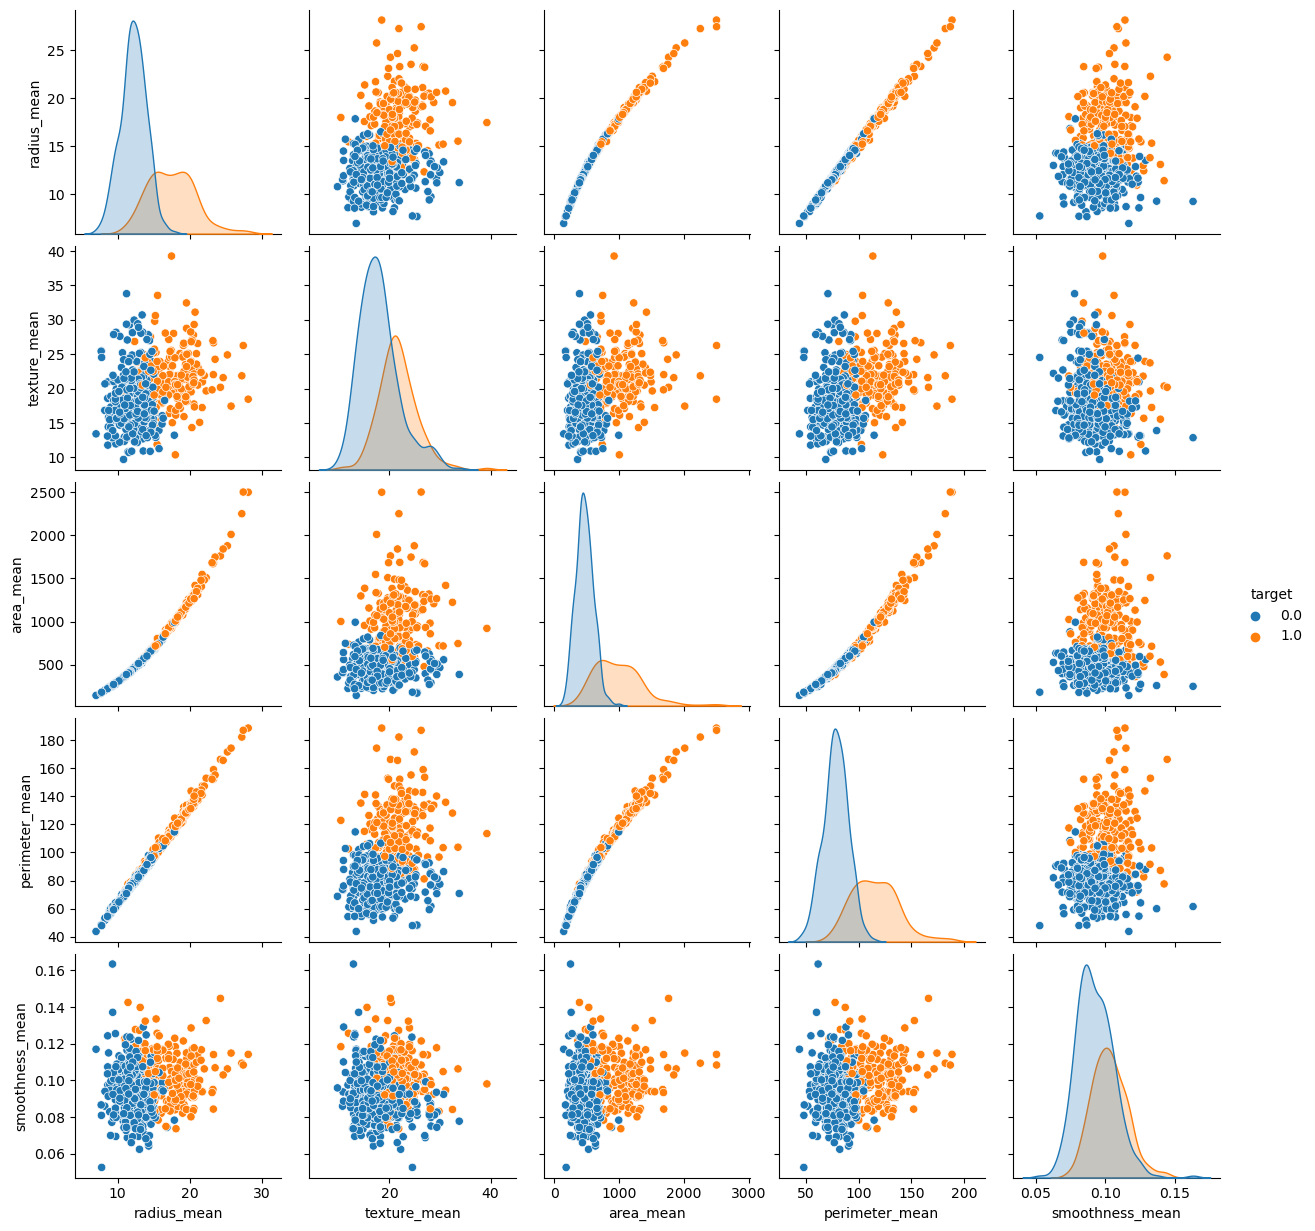

In [10]:
sns.pairplot(df, hue = 'target', vars = ['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean'] )

<Axes: ylabel='count'>

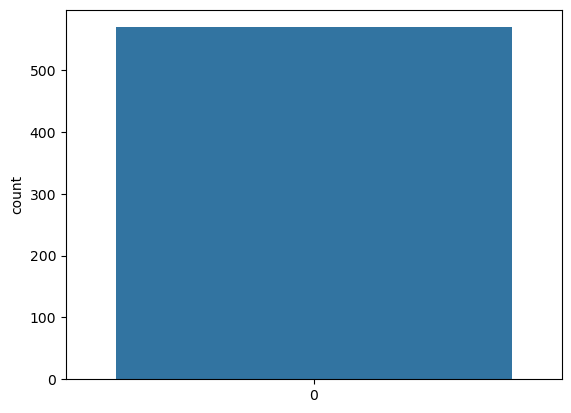

In [11]:
sns.countplot(df['target']) 

<Axes: xlabel='area_mean', ylabel='smoothness_mean'>

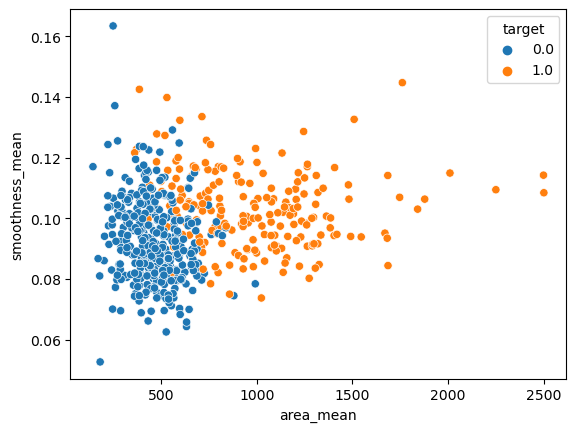

In [12]:
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'target', data = df)


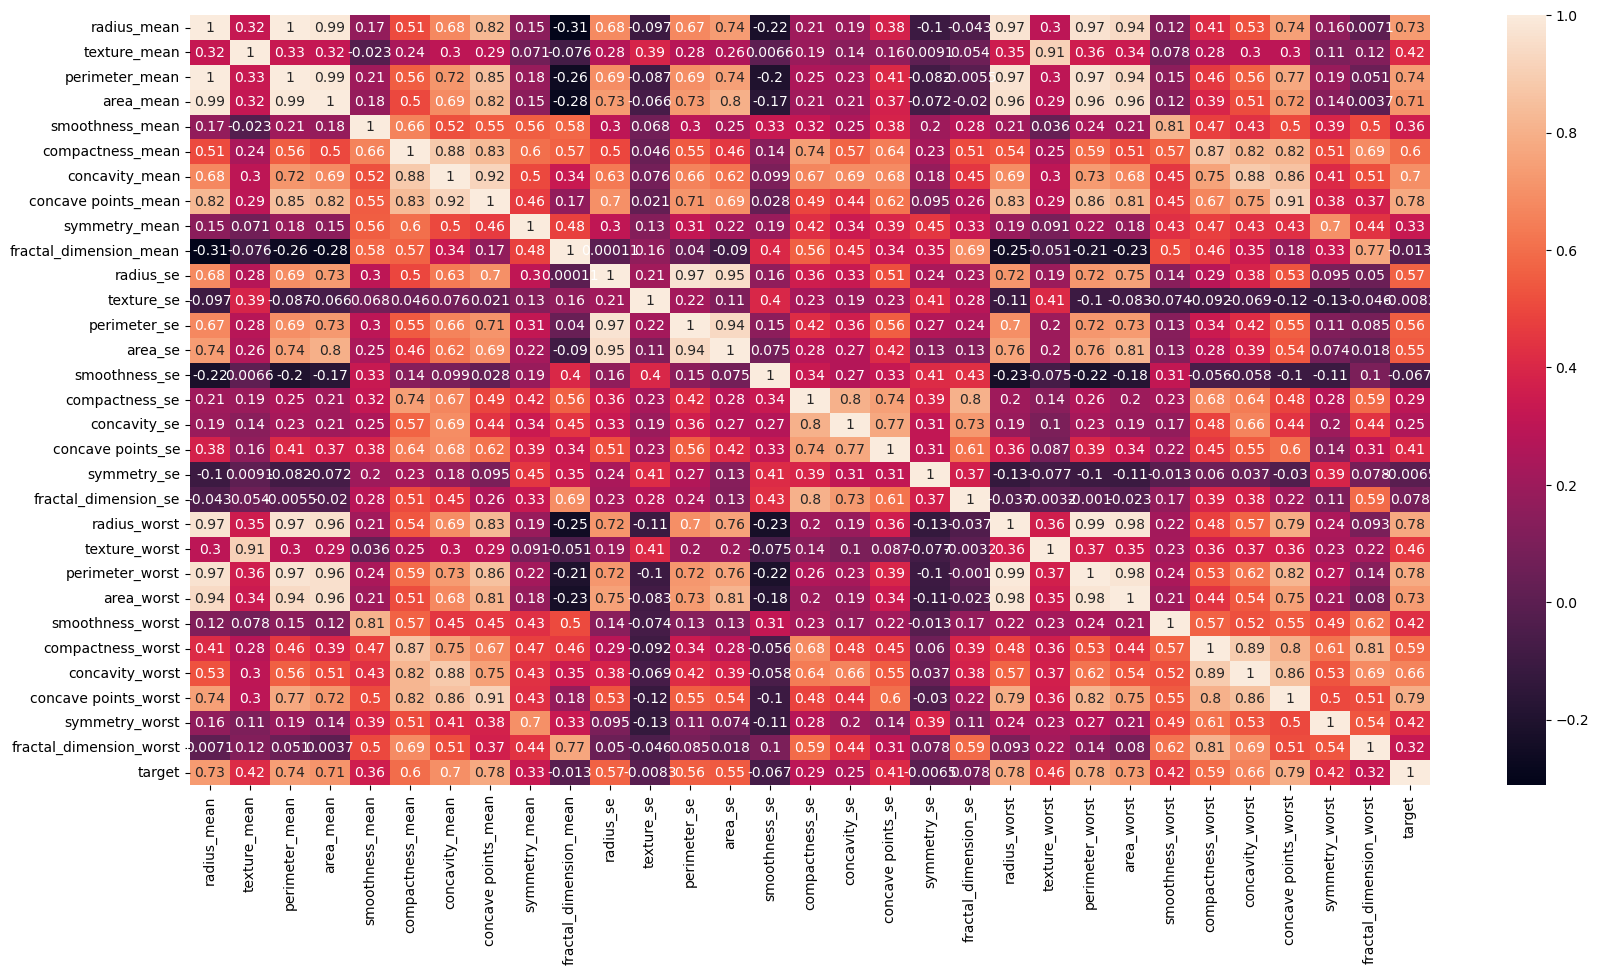

In [14]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(df[["radius_mean", "texture_mean", "perimeter_mean","area_mean", "smoothness_mean", "compactness_mean", "concavity_mean","concave points_mean", "symmetry_mean", "fractal_dimension_mean","radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se","compactness_se", "concavity_se", "concave points_se", "symmetry_se","fractal_dimension_se", "radius_worst", "texture_worst","perimeter_worst", "area_worst", "smoothness_worst","compactness_worst", "concavity_worst", "concave points_worst","symmetry_worst", "fractal_dimension_worst","target"]].corr(),annot=True);

# MODEL TRAINING INIT

In [15]:

# Drop the target label coloumns
X = df.drop(['diagnosis','target','Unnamed: 32','target_names'],axis=1)


In [16]:
X

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...

In [17]:
y = df['target']
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    0.0
Name: target, Length: 569, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)


In [19]:
X_train.shape


(455, 31)

In [20]:
X_test.shape


(114, 31)

In [21]:
y_train.shape


(455,)

In [22]:
y_test.shape


(114,)

In [23]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)


SVC()

# MODEL EVALUATION

In [24]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)


<Axes: >

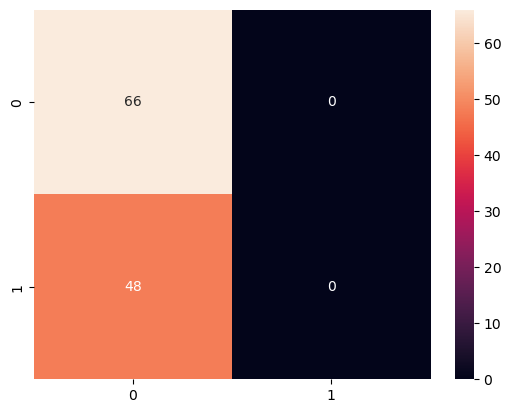

In [25]:
sns.heatmap(cm, annot=True)

In [26]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

         0.0       0.58      1.00      0.73        66
         1.0       0.00      0.00      0.00        48

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



/Users/jontziv/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jontziv/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jontziv/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MODEL IMPROVEMENT

In [27]:
min_train = X_train.min()
min_train

id                         8670.000000
radius_mean                   6.981000
texture_mean                  9.710000
perimeter_mean               43.790000
area_mean                   143.500000
smoothness_mean               0.052630
compactness_mean              0.019380
concavity_mean                0.000000
concave points_mean           0.000000
symmetry_mean                 0.106000
fractal_dimension_mean        0.049960
radius_se                     0.111500
texture_se                    0.362100
perimeter_se                  0.757000
area_se                       6.802000
smoothness_se                 0.001713
compactness_se                0.002252
concavity_se                  0.000000
concave points_se             0.000000
symmetry_se                   0.007882
fractal_dimension_se          0.000950
radius_worst                  7.930000
texture_worst                12.020000
perimeter_worst              50.410000
area_worst                  185.200000
smoothness_worst         

In [28]:
range_train = (X_train - min_train).max()
range_train

id                         9.113118e+08
radius_mean                2.112900e+01
texture_mean               2.957000e+01
perimeter_mean             1.447100e+02
area_mean                  2.355500e+03
smoothness_mean            1.107700e-01
compactness_mean           3.260200e-01
concavity_mean             4.268000e-01
concave points_mean        2.012000e-01
symmetry_mean              1.980000e-01
fractal_dimension_mean     4.579000e-02
radius_se                  2.761500e+00
texture_se                 4.522900e+00
perimeter_se               2.122300e+01
area_se                    5.187980e+02
smoothness_se              2.941700e-02
compactness_se             1.331480e-01
concavity_se               3.960000e-01
concave points_se          5.279000e-02
symmetry_se                7.106800e-02
fractal_dimension_se       2.888980e-02
radius_worst               2.519000e+01
texture_worst              3.752000e+01
perimeter_worst            1.703900e+02
area_worst                 3.246800e+03


In [29]:
X_train_scaled = (X_train - min_train)/range_train

In [30]:
X_train_scaled

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
306  0.000089     0.294335      0.206628        0.278350   0.167183   
410  0.000984     0.207251      0.265810        0.198328   0.108809   
197  0.000953     0.525297      0.410213        0.508673   0.373806   
376  0.000980     0.169861      0.355428        0.182157   0.082700   
244  0.000961     0.587770      0.466351        0.589524   0.429421   
..        ...          ...           ...             ...        ...   
8    0.000918     0.284869      0.409537        0.302052   0.159754   
73   0.000934     0.322732      0.205614        0.322300   0.187052   
400  0.099232     0.517251      0.382482        0.557045   0.361070   
118  0.000940     0.416442      0.446398        0.427821   0.271322   
206  0.000956     0.137015      0.255665        0.132195   0.064487   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
306         0.293220          0.101620        0.003423             0.016208   
410         0.324546          0.103521        0.065206             0.104374   
197         0.190304          0.205632        0.258435             0.287177   
376         0.343956          0.449727        0.534208             0.295278   
244         0.452018          0.418441        0.480084             0.441650   
..               ...               ...             ...                  ...   
8           0.674099          0.533157        0.435567             0.464861   
73          0.433962          0.333170        0.182498             0.251938   
400         0.635280          0.730691        0.747188             0.595427   
118         0.567572          0.477946        0.499766             0.471123   
206         0.507990          0.162383        0.041143             0.097018   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
306       0.288889  ...      0.257245       0.224680         0.244087   
410       0.273232  ...      0.203255       0.647655         0.203416   
197       0.358586  ...      0.469631       0.337953         0.461823   
376       0.569697  ...      0.115919       0.287846         0.153178   
244       0.463636  ...      0.544661       0.493337         0.554551   
..             ...  ...           ...            ...              ...   
8         0.651515  ...      0.300119       0.498667         0.327425   
73        0.304040  ...      0.342993       0.235608         0.351488   
400       0.531818  ...      0.510917       0.420043         0.582135   
118       0.523232  ...      0.486701       0.492537         0.468866   
206       0.441414  ...      0.098849       0.298507         0.097834   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
306    0.139122          0.321641           0.104113         0.010136   
410    0.103517          0.572742           0.130890         0.163891   
197    0.321178          0.131731           0.163974         0.229412   
376    0.051343          0.333230           0.324640         0.545701   
244    0.379389          0.580468           0.261480         0.312941   
..          ...               ...                ...              ...   
8      0.170660          0.765897           0.497531         0.487783   
73     0.193175          0.540292           0.317170         0.251493   
400    0.344585          0.897242           0.547593         0.817557   
118    0.334730          0.883335           0.451349         0.665701   
206    0.045091          0.543383           0.094508         0.056226   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
306              0.085911        0.258019                 0.188968  
410              0.298900        0.334521                 0.146989  
197              0.315498        0.191019                 0.069133  
376              0.503436        0.245189                 0.426079  
244              0.537457        0.321929                 0.138397  
..                    ...             ...

<Axes: xlabel='area_mean', ylabel='smoothness_mean'>

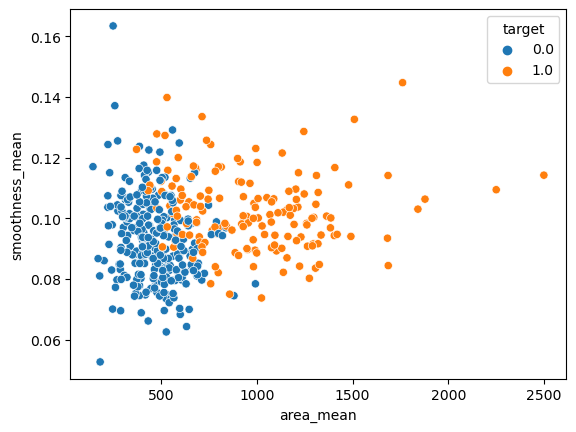

In [31]:
sns.scatterplot(x = X_train['area_mean'], y = X_train['smoothness_mean'], hue = y_train)

<Axes: xlabel='area_mean', ylabel='smoothness_mean'>

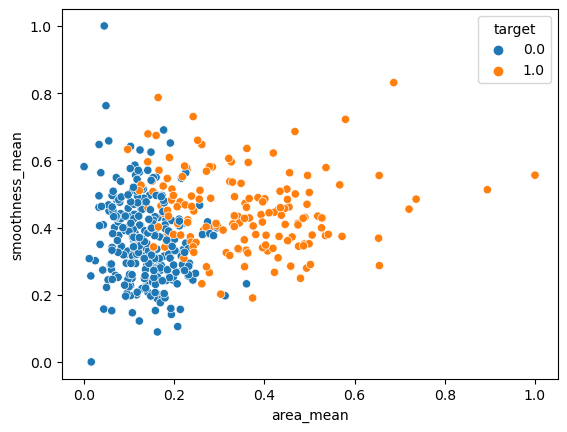

In [32]:
sns.scatterplot(x = X_train_scaled['area_mean'], y = X_train_scaled['smoothness_mean'], hue = y_train)

In [33]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [34]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

<Axes: >

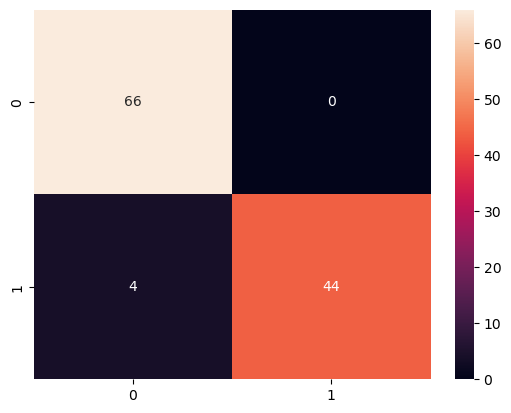

In [35]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [36]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        66
         1.0       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# MODEL IMPROVEMENT - PT. 2

In [37]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [40]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [41]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [42]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [43]:
grid_predictions = grid.predict(X_test_scaled)

In [44]:
cm = confusion_matrix(y_test, grid_predictions)

<Axes: >

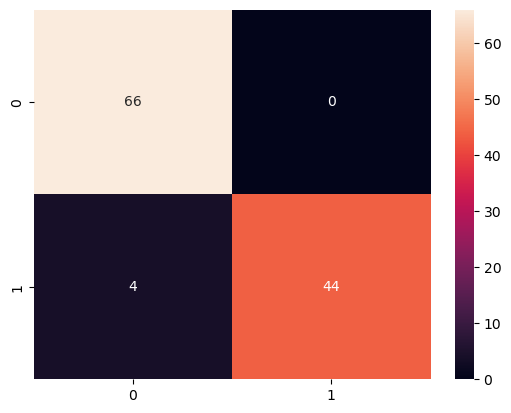

In [45]:
sns.heatmap(cm, annot=True)

In [46]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        66
         1.0       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Random Forest Model

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [48]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0  ...      2019.0            0.1622             0.6656           0.7119   
1  ...      1956.0            0.1238             0.1866           0.2416   
2  ...      1709.0            0.1444             0.4245           0.4504   
3  ...       567.7            0.2098             0.8663           0.6869   
4  ...      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  Unnamed: 32  \
0                0.2654          0.4601                  0.11890          NaN   
1                0.1860          0.2750                  0.08902          NaN   
2                0.2430          0.3613                  0.08758          NaN   
3                0.2575          0.6638                  0.17300          NaN   
4                0.1625          0.2364                  0.07678          NaN   

   target  target_names  
0     1.0     malignant  
1     1.0     malignant  
2     1.0     malignant  
3     1.0     malignant  
4     1.0     malignant  

[5 rows x 35 columns]

In [49]:
y=df.diagnosis
drop_cols=['Unnamed: 32','id','diagnosis']
x=df.drop(drop_cols,axis=1)
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  perimeter_worst  area_worst  smoothness_worst  \
0                 0.07871  ...           184.60      2019.0            0.1622   
1                 0.05667  ...           158.80      1956.0            0.1238   
2                 0.05999  ...           152.50      1709.0            0.1444   
3                 0.09744  ...            98.87       567.7            0.2098   
4                 0.05883  ...           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  target  target_names  
0                  0.11890     1.0     malignant  
1                  0.08902     1.0     malignant  
2                  0.08758     1.0     malignant  
3                  0.17300     1.0     malignant  
4                  0.07678     1.0     malignant  

[5 rows x 32 columns]

In [50]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [56]:
B,M=y.value_counts()
print("Benign Tumours is ", B)
print("Malignant Tumours is ", M)

Benign Tumours is  357
Malignant Tumours is  212


In [58]:
x.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  texture_worst  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       fractal_dimension_worst      target  
count               569.000000  569.000000  
mean                  0.083946    0.372583  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    0.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [59]:
drop_list = ['target_names']
x1 = x.drop(drop_list ,axis = 1 )        
x1.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  target  
0          0.4601                  0.11890     1.0  
1          0.2750                  0.08902     1.0  
2          0.3613                  0.08758     1.0  
3          0.6638                  0.17300     1.0  
4          0.2364                  0.07678     1.0  

[5 rows x 31 columns]

/Users/jontziv/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jontziv/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jontziv/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jontziv/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jontziv/anaconda3/lib/python3.11/site-packages/seabor

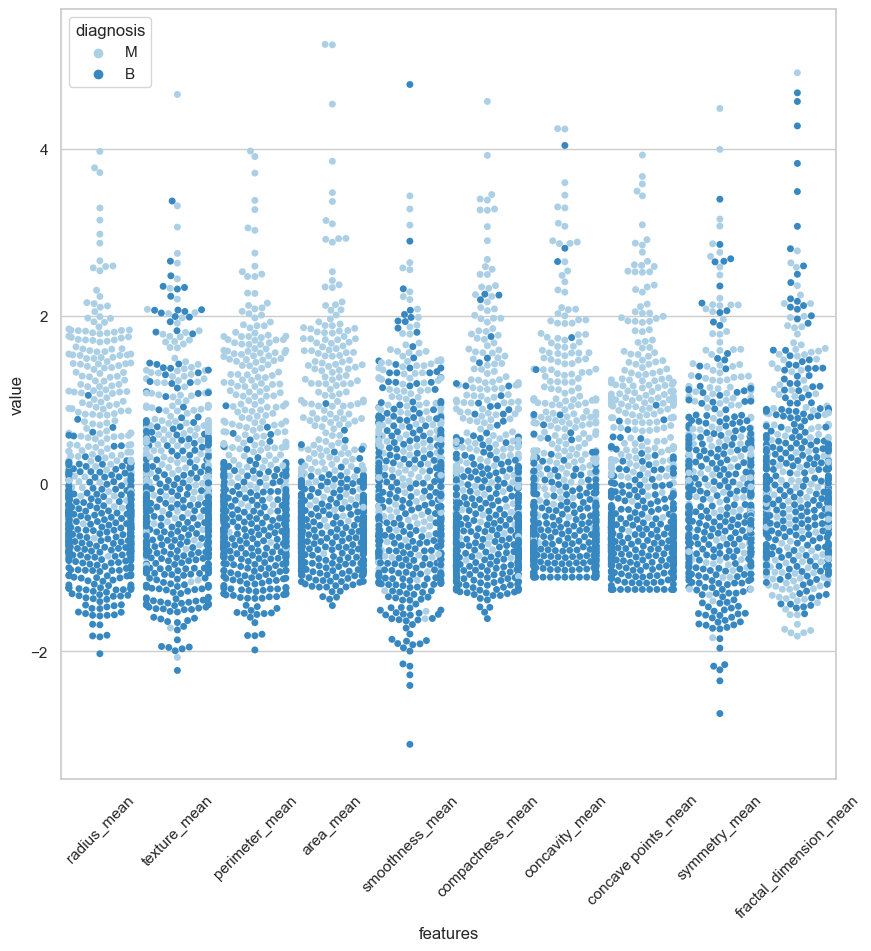

In [60]:
sns.set(style='whitegrid')
data=x1
data_std=(data-data.mean())/data.std()
data=pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data,palette='Blues')
plt.xticks(rotation=45)
plt.show()

/Users/jontziv/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jontziv/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jontziv/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 66.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jontziv/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jontziv/anaconda3/lib/python3.11/site-packages/seabor

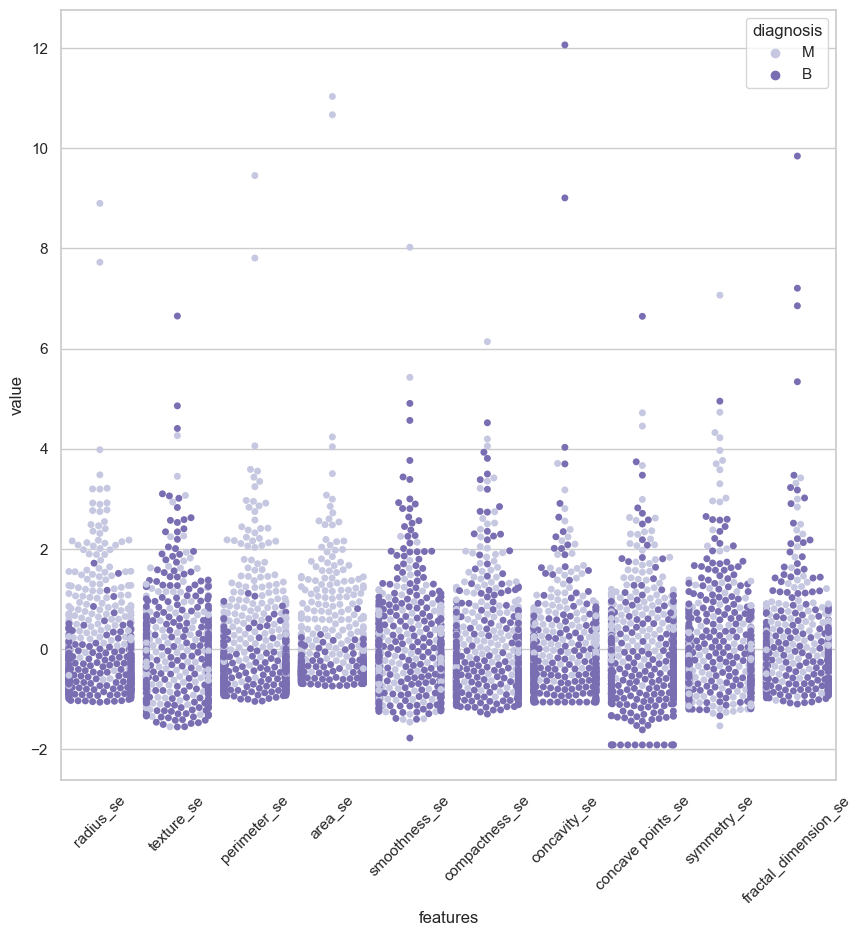

In [108]:
sns.set(style='whitegrid')
data=x1
data_std=(data-data.mean())/data.std()
data=pd.concat([y,data_std.iloc[:,10:20]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data,palette='Purples')
plt.xticks(rotation=45)
plt.show()

/Users/jontziv/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jontziv/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jontziv/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 46.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jontziv/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 53.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jontziv/anaconda3/lib/python3.11/site-packages/seabor

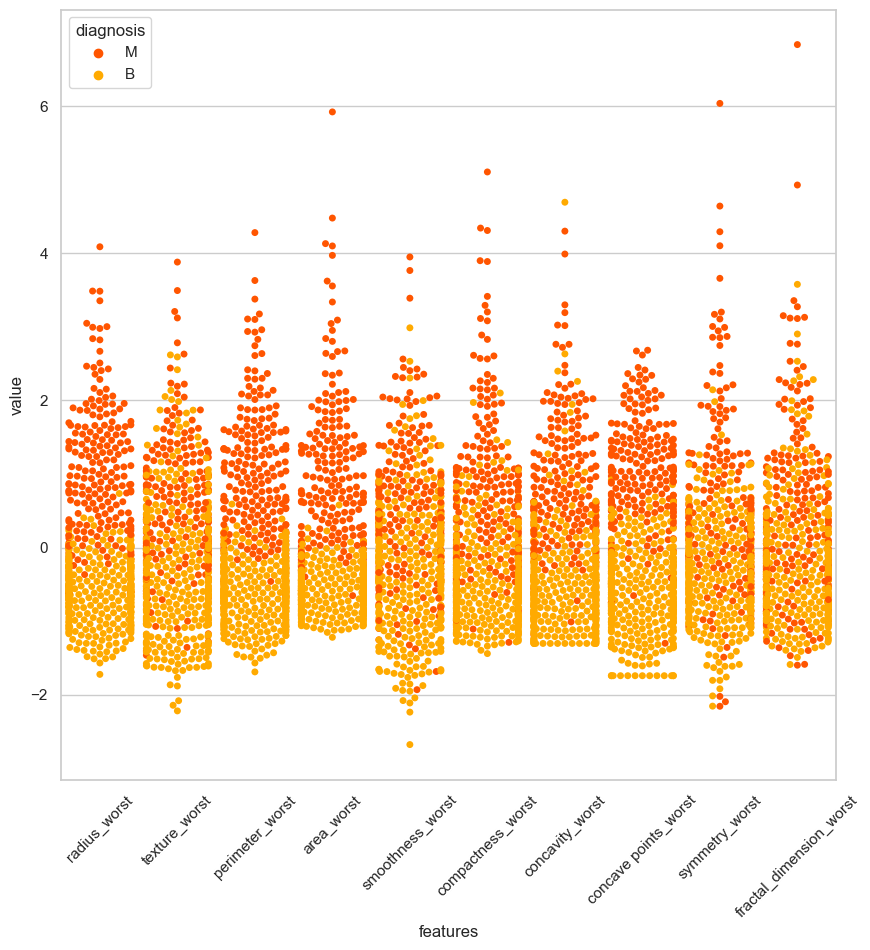

In [112]:
sns.set(style='whitegrid')
data=x1
data_std=(data-data.mean())/data.std()
data=pd.concat([y,data_std.iloc[:,20:30]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data,palette='autumn')
plt.xticks(rotation=45)
plt.show()

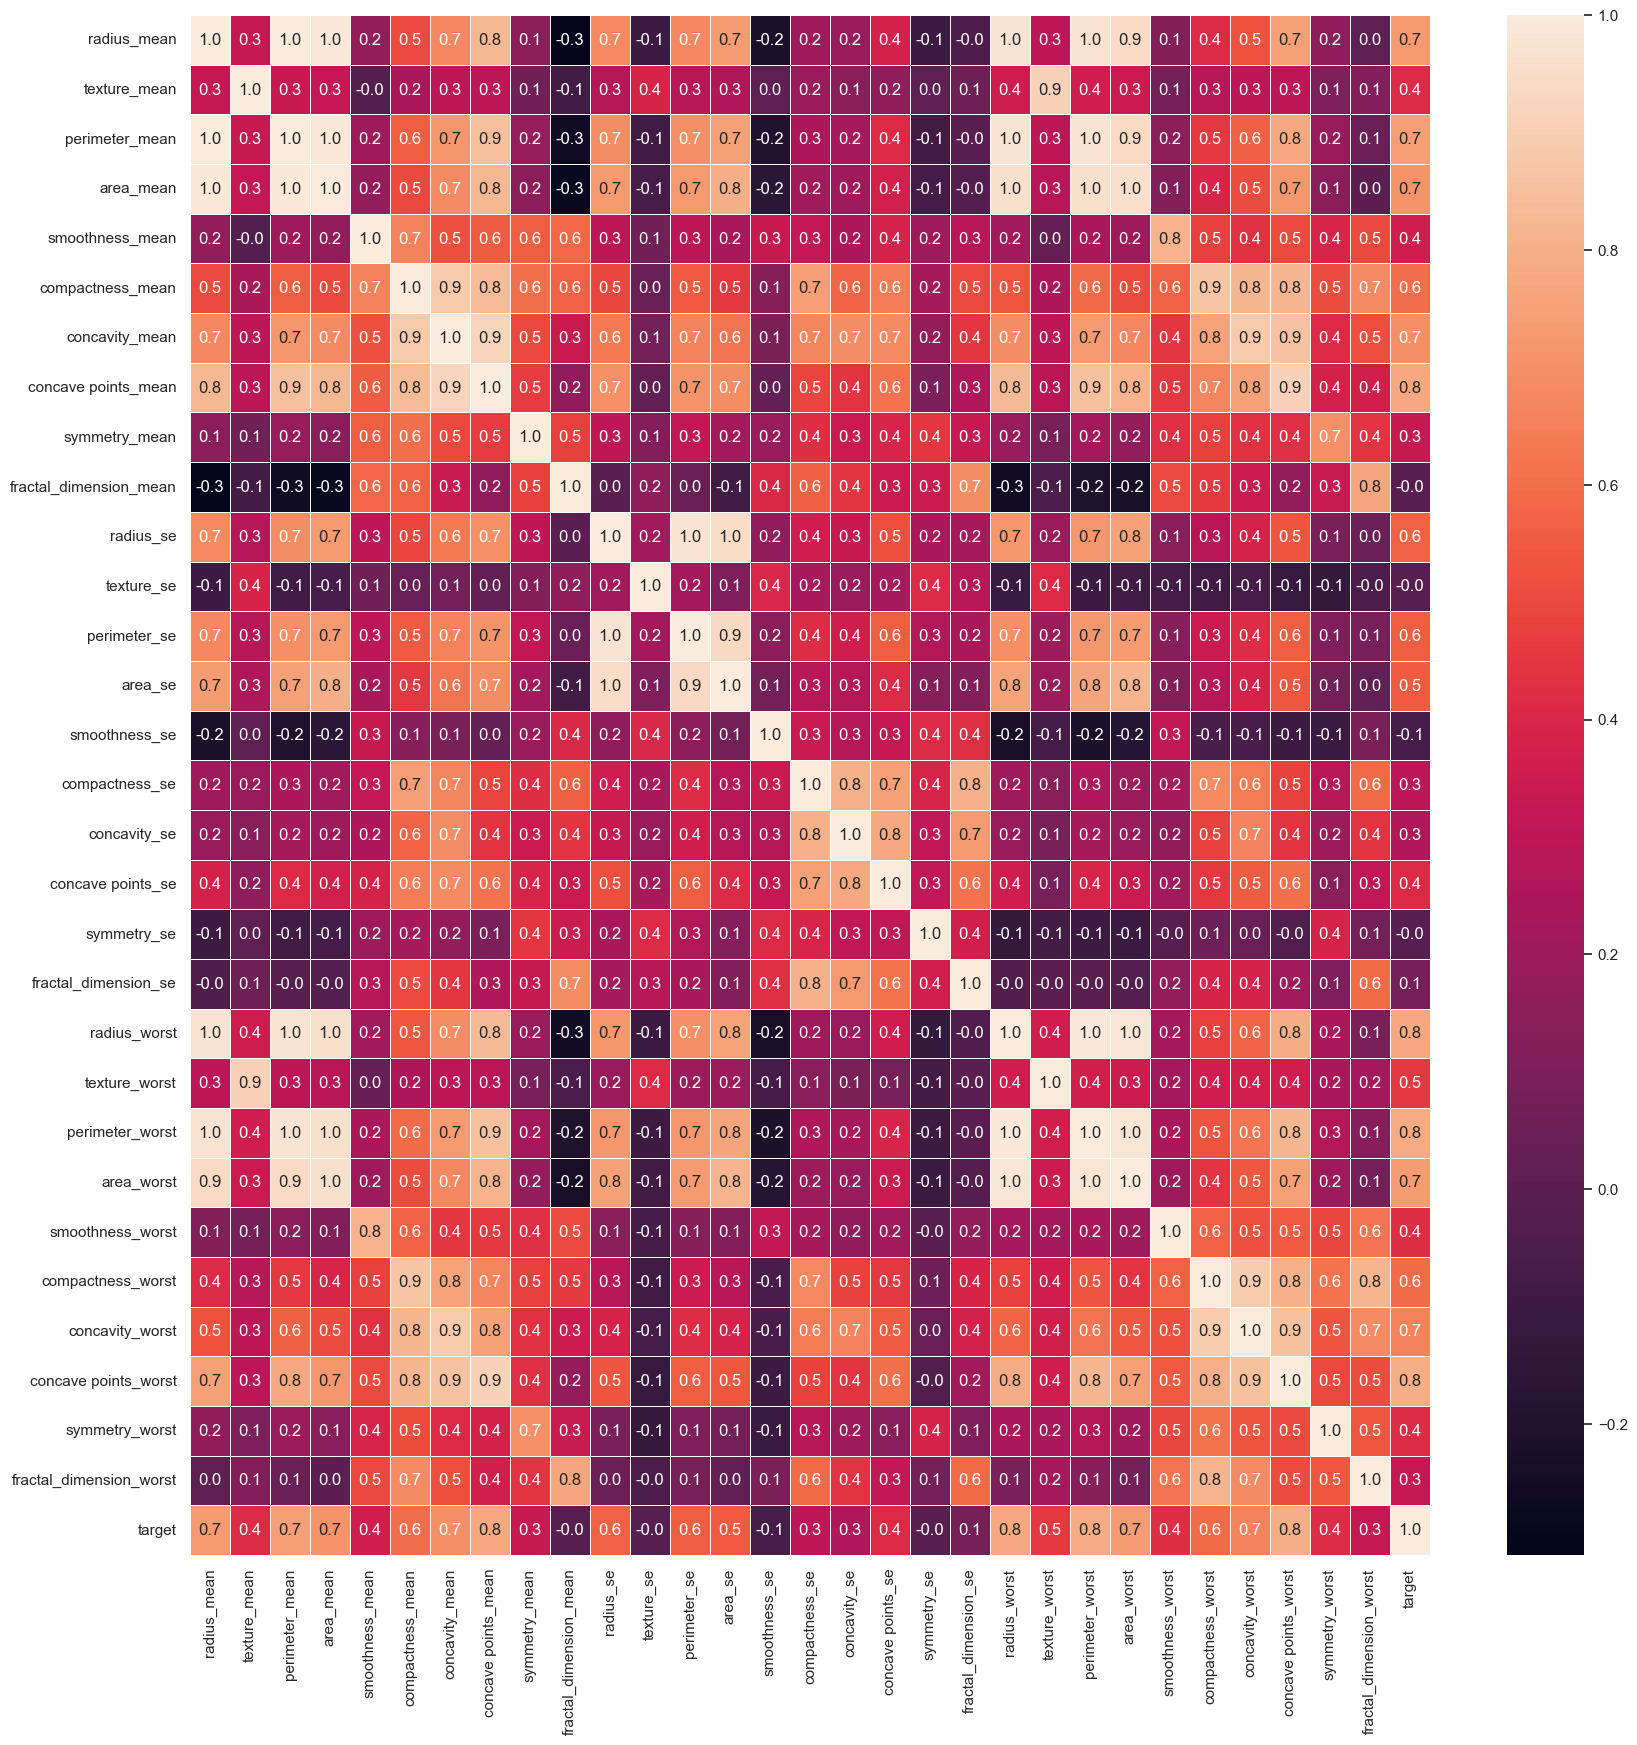

In [110]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(x1.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

In [147]:
drop_list = ['fractal_dimension_mean','symmetry_mean','smoothness_mean','target','target_names']
x1 = x.drop(drop_list ,axis = 1 )        
x1.head()


radius_mean  texture_mean  perimeter_mean  area_mean  compactness_mean  \
0        17.99         10.38          122.80     1001.0           0.27760   
1        20.57         17.77          132.90     1326.0           0.07864   
2        19.69         21.25          130.00     1203.0           0.15990   
3        11.42         20.38           77.58      386.1           0.28390   
4        20.29         14.34          135.10     1297.0           0.13280   

   concavity_mean  concave points_mean  radius_se  texture_se  perimeter_se  \
0          0.3001              0.14710     1.0950      0.9053         8.589   
1          0.0869              0.07017     0.5435      0.7339         3.398   
2          0.1974              0.12790     0.7456      0.7869         4.585   
3          0.2414              0.10520     0.4956      1.1560         3.445   
4          0.1980              0.10430     0.7572      0.7813         5.438   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 27 columns]

In [150]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean',
'radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst',
'concavity_worst','compactness_se','concave points_se','texture_worst','area_worst','target','target_names']
x1 = x.drop(drop_list ,axis = 1 )        
x1.head()

texture_mean  area_mean  smoothness_mean  concavity_mean  symmetry_mean  \
0         10.38     1001.0          0.11840          0.3001         0.2419   
1         17.77     1326.0          0.08474          0.0869         0.1812   
2         21.25     1203.0          0.10960          0.1974         0.2069   
3         20.38      386.1          0.14250          0.2414         0.2597   
4         14.34     1297.0          0.10030          0.1980         0.1809   

   fractal_dimension_mean  texture_se  area_se  smoothness_se  concavity_se  \
0                 0.07871      0.9053   153.40       0.006399       0.05373   
1                 0.05667      0.7339    74.08       0.005225       0.01860   
2                 0.05999      0.7869    94.03       0.006150       0.03832   
3                 0.09744      1.1560    27.23       0.009110       0.05661   
4                 0.05883      0.7813    94.44       0.011490       0.05688   

   symmetry_se  fractal_dimension_se  smoothness_worst  concave points_worst  \
0      0.03003              0.006193            0.1622                0.2654   
1      0.01389              0.003532            0.1238                0.1860   
2      0.02250              0.004571            0.1444                0.2430   
3      0.05963              0.009208            0.2098                0.2575   
4      0.01756              0.005115            0.1374                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

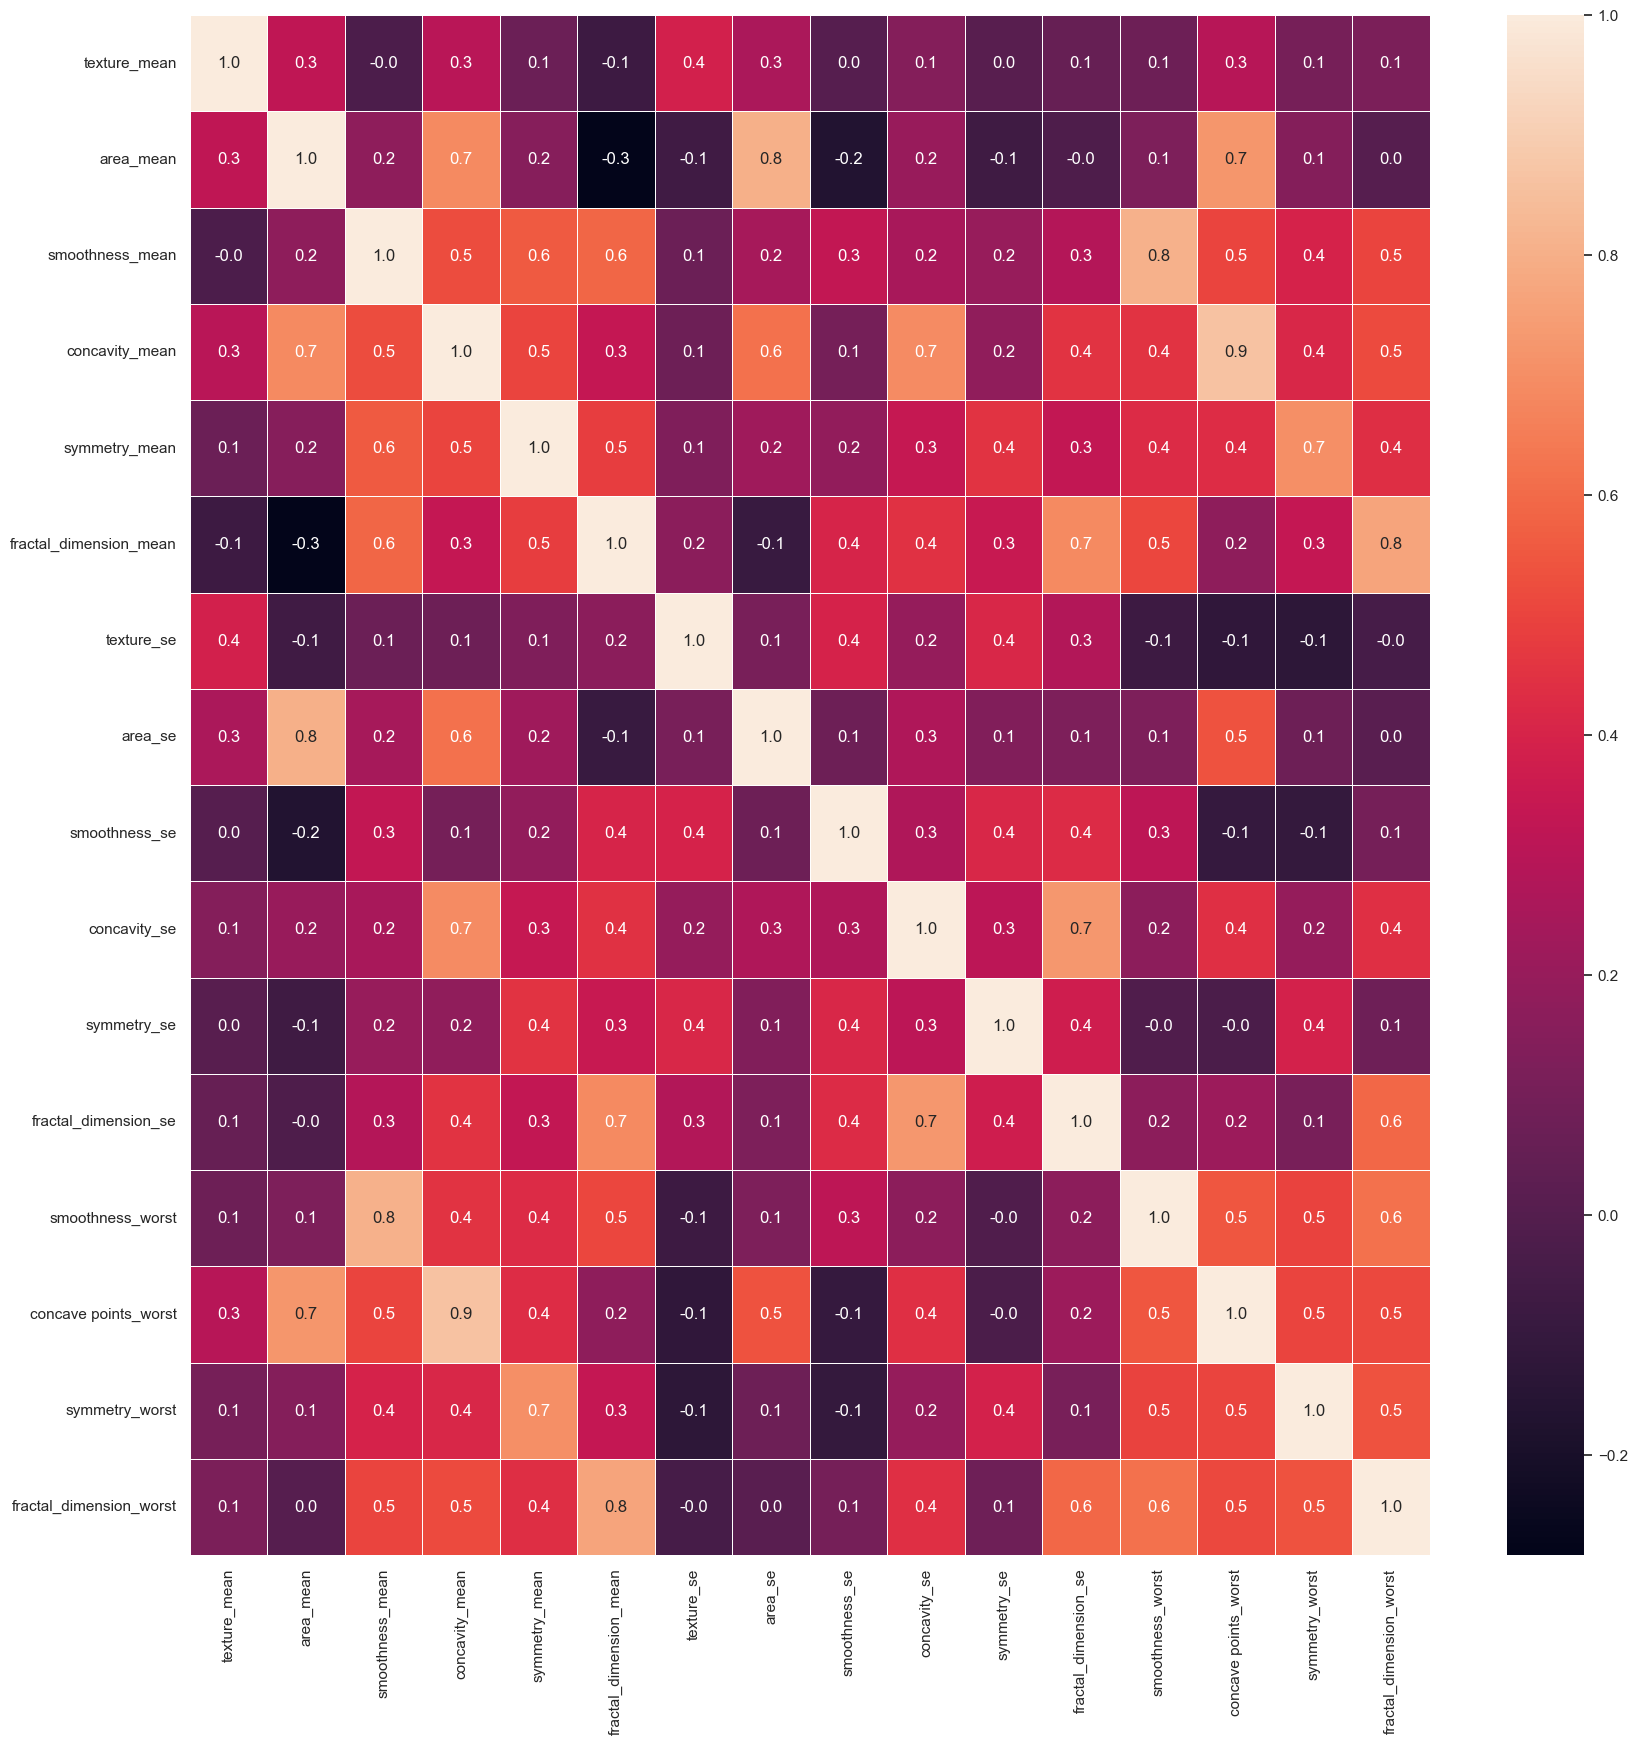

In [151]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(x1.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

Accuracy is:  97.36842105263158


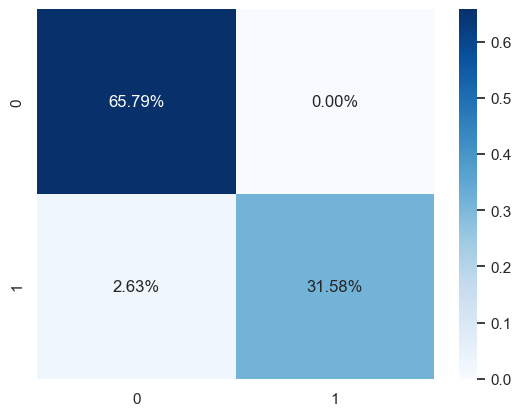

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=21)

#n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=42)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac*100)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()